# 4 FEATURE NEXT DAY PREDICTION WINDO SIZE=100

In [171]:
"""
JUST CHANGE data[feature] : feature with tmin,tmax,tavg 
                            and change Scaler with Standard Scaler and MinMax Scaler
                            remain all other code same 

And You wil get result as i got which i mentioned in All model evalution portion.

"""

'\nJUST CHANGE data[feature] : feature with tmin,tmax,tavg \n                            and change Scaler with Standard Scaler and MinMax Scaler\n                            remain all other code same \n\nAnd You wil get result as i got which i mentioned in All model evalution portion.\n\n'

In [2]:
!pip install meteostat

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten,BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


2025-05-11 14:57:17.572384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746975438.004142      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746975438.124486      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="jainam")

# Example city
city = "Ahmedabad, India"

location = geolocator.geocode(city)

if location:
    print(f"City: {city}")
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print(f"Could not find coordinates for {city}")


City: Ahmedabad, India
Latitude: 23.0215374, Longitude: 72.5800568


In [4]:
def plot_loss_curves(history):
    """
    Plots the loss curves of a model
    """
    loss = history['loss']
    val_loss = history['val_loss']

    accuracy = history['mae']
    val_accuracy = history['val_mae']

    epochs = range(len(history['loss']))


    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [44]:
from meteostat import Point, Hourly
import datetime


location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 12, 31)

# Get historical data
data = Hourly(location, start, end)
data = data.fetch()

print(data)


                     temp  dwpt  rhum  prcp  snow  wdir  wspd  wpgt    pres  \
time                                                                          
2008-01-01 00:00:00  13.0   9.4  79.0   NaN   NaN   NaN   0.0   NaN  1014.0   
2008-01-01 01:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
2008-01-01 02:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
2008-01-01 03:00:00  15.0   9.1  68.0   NaN   NaN   NaN   0.0   NaN  1016.3   
2008-01-01 04:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
...                   ...   ...   ...   ...   ...   ...   ...   ...     ...   
2024-12-30 20:00:00  16.0  12.0  77.0   0.0   NaN   0.0   0.0   NaN  1016.0   
2024-12-30 21:00:00  16.4  11.1  71.0   0.0   NaN  10.0   5.4   NaN  1016.7   
2024-12-30 22:00:00  16.0  10.1  68.0   0.0   NaN  10.0  11.2   NaN  1016.0   
2024-12-30 23:00:00  16.0  10.1  68.0   0.0   NaN  20.0  11.2   NaN  1016.0   
2024-12-31 00:00:00  16.4  10.0  66.0   0.0   NaN  5

In [45]:
print(data.shape)

(149017, 11)


In [46]:
target_column="temp"

In [47]:
data.reset_index(inplace=True)

In [48]:
temperature_max=data[["time","temp"]]

In [49]:
temperature_max['month'] = temperature_max['time'].dt.month
temperature_max['hour'] = temperature_max['time'].dt.hour  


seasonal_mean = temperature_max.groupby(['month', 'hour'])["temp"].transform('mean') 
temperature_max[target_column] = temperature_max[target_column].fillna(seasonal_mean) 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
print("TOTAL NULL VALUES IN DATASET:",temperature_max.isnull().sum())

TOTAL NULL VALUES IN DATASET: time     0
temp     0
month    0
hour     0
dtype: int64


In [51]:
temperature_max.describe()

,time,temp,month,hour
count,149017,149017.000000,149017.000000,149017.000000
mean,2016-07-01 12:00:00,27.939349,6.521538,11.499923
min,2008-01-01 00:00:00,7.000000,1.000000,0.000000
25%,2012-04-01 06:00:00,24.200000,4.000000,5.000000
50%,2016-07-01 12:00:00,28.262366,7.000000,11.000000
75%,2020-09-30 18:00:00,32.000000,10.000000,17.000000
max,2024-12-31 00:00:00,50.000000,12.000000,23.000000
std,NaN,6.317021,3.448459,6.922251


In [52]:
temperature_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149017 entries, 0 to 149016
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    149017 non-null  datetime64[ns]
 1   temp    149017 non-null  float64       
 2   month   149017 non-null  int32         
 3   hour    149017 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 3.4 MB


In [53]:
temperature_max["dayofyear"]=temperature_max["time"].dt.dayofyear

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
temperature_max_processed=temperature_max[[target_column,"month","hour","dayofyear"]]

In [55]:
window_size=100

X=[]
Y=[]

for i in range(len(temperature_max_processed)-window_size):
    X.append(temperature_max_processed[[target_column, 'month', 'hour', 'dayofyear']].iloc[i:i+window_size].values)
    Y.append(temperature_max_processed[target_column].iloc[i+window_size])

In [56]:
X=np.array(X)
Y=np.array(Y)

In [57]:
print("X Shape",X.shape)
print("Y Shape",Y.shape)


X Shape (148917, 100, 4)
Y Shape (148917,)


In [61]:
X

array([[[ 13.        ,   1.        ,   0.        ,   1.        ],
        [ 13.85198556,   1.        ,   1.        ,   1.        ],
        [ 13.75920578,   1.        ,   2.        ,   1.        ],
        ...,
        [ 13.85198556,   1.        ,   1.        ,   5.        ],
        [ 13.75920578,   1.        ,   2.        ,   5.        ],
        [ 15.4       ,   1.        ,   3.        ,   5.        ]],

       [[ 13.85198556,   1.        ,   1.        ,   1.        ],
        [ 13.75920578,   1.        ,   2.        ,   1.        ],
        [ 15.        ,   1.        ,   3.        ,   1.        ],
        ...,
        [ 13.75920578,   1.        ,   2.        ,   5.        ],
        [ 15.4       ,   1.        ,   3.        ,   5.        ],
        [ 18.05818182,   1.        ,   4.        ,   5.        ]],

       [[ 13.75920578,   1.        ,   2.        ,   1.        ],
        [ 15.        ,   1.        ,   3.        ,   1.        ],
        [ 18.05818182,   1.        ,   4.     

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("Y_train Shape",Y_train.shape)
print("Y_test Shape",Y_test.shape)


X_train Shape (119133, 100, 4)
X_test Shape (29784, 100, 4)
Y_train Shape (119133,)
Y_test Shape (29784,)


In [106]:
X_train

array([[ 0.20080145,  0.04584215, -0.10911716, ..., -0.10911716,
        -0.01614158, -0.41903576],
       [ 1.56444331,  0.88262238,  0.72766308, ...,  0.35576075,
         0.20080145,  0.51072005],
       [-1.50375088, -0.17110088,  0.32476889, ..., -0.69796251,
         0.75865494,  0.85163052],
       ...,
       [-0.0781253 ,  0.04584215,  0.20080145, ...,  0.51072005,
         0.66567936,  0.6346875 ],
       [ 1.44047587,  1.28551657,  1.28551657, ...,  1.28551657,
         0.9446061 ,  0.66567936],
       [ 0.51072005,  0.51072005,  0.44873633, ...,  0.35576075,
         0.51072005,  0.35576075]])

In [64]:
from sklearn.preprocessing import StandardScaler
Standard=StandardScaler()
X_train_Scaled=Standard.fit_transform(X_train.reshape(-1,1))
X_test_Scaled=Standard.transform(X_test.reshape(-1,1))

In [65]:
X_train=X_train_Scaled.reshape(X_train.shape[0],100,4)

In [66]:
X_test=X_test_Scaled.reshape(X_test.shape[0],100,4)

In [67]:
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("Y_train Shape",Y_train.shape)
print("Y_test Shape",Y_test.shape)


X_train Shape (119133, 100, 4)
X_test Shape (29784, 100, 4)
Y_train Shape (119133,)
Y_test Shape (29784,)


# IMPORTING IMPORTANT LIBRARIES FOR DEEP LEARNING

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten,BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint(
    "temperature_Standard.keras",
    monitor = "val_loss",
    mode = "min",
    save_best_only = True,
    verbose = 1
)

earlyStop=EarlyStopping(
    monitor="val_loss",
    patience=3
)

# INITIALIZING MODEL STRUCTURE

In [70]:
maxLength=6
upgraded_naive_model1=Sequential()
upgraded_naive_model1.add(LSTM(128,return_sequences=True,input_shape=(window_size,4)))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(LSTM(100,return_sequences=True))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(LSTM(100,return_sequences=True))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(LSTM(100))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(Dense(128,activation="relu"))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(Dense(64,activation="relu"))
upgraded_naive_model1.add(BatchNormalization())
upgraded_naive_model1.add(Dropout(0.2))

upgraded_naive_model1.add(Dense(1))


I0000 00:00:1746977280.494897      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746977280.495583      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [71]:
upgraded_naive_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 344,225 (1.31 MB)

 Trainable params: 342,985 (1.31 MB)

 Non-trainable params: 1,240 (4.84 KB)

In [72]:
upgraded_naive_model1.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [73]:
X_test.shape, Y_test.shape

((29784, 100, 4), (29784,))

In [74]:
history=upgraded_naive_model1.fit(np.array(X_train).reshape(-1,window_size,4),Y_train,epochs=25,batch_size=32,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/25


I0000 00:00:1746977293.732600     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


3723/3723 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 222.0262 - mae: 10.5072
Epoch 1: val_loss improved from inf to 3.58768, saving model to temperature_Standard.keras
3723/3723 ━━━━━━━━━━━━━━━━━━━━ 99s 24ms/step - loss: 221.9863 - mae: 10.5057 - val_loss: 3.5877 - val_mae: 1.4385
Epoch 2/25
3721/3723 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.0540 - mae: 2.3638
Epoch 2: val_loss improved from 3.58768 to 2.56454, saving model to temperature_Standard.keras
3723/3723 ━━━━━━━━━━━━━━━━━━━━ 89s 24ms/step - loss: 9.0534 - mae: 2.3637 - val_loss: 2.5645 - val_mae: 1.2133
Epoch 3/25
3722/3723 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.2787 - mae: 2.1241
Epoch 3: val_loss did not improve from 2.56454
3723/3723 ━━━━━━━━━━━━━━━━━━━━ 90s 24ms/step - loss: 7.2786 - mae: 2.1241 - val_loss: 3.8036 - val_mae: 1.5047
Epoch 4/25
3722/3723 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.7039 - mae: 2.0404
Epoch 4: val_loss improved from 2.56454 to 2.05902, saving model to temperature_Standard.keras
3723/372

In [75]:
final_history={}

for key in history.history.keys():
    final_history[key]=history.history[key]


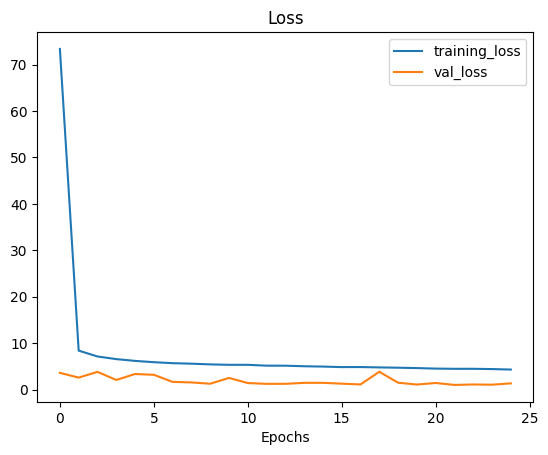

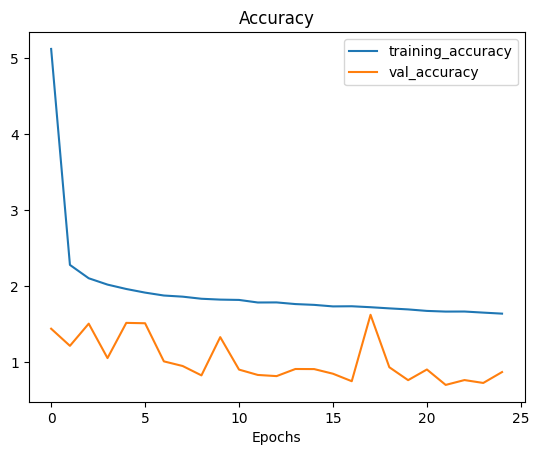

In [76]:
plot_loss_curves(final_history)

In [77]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_Standard.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [78]:
from meteostat import Point, Hourly
import datetime


location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(2024, 6, 1)
end = datetime.datetime(2024, 6, 3)

# Get historical data
data = Hourly(location, start, end)
data = data.fetch()

print(data)


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2024-06-01 00:00:00  31.0  23.1  63.0   0.0   NaN  230.0   5.4   NaN  1003.5   
2024-06-01 01:00:00  30.0  21.9  62.0   0.0   NaN  210.0  18.4   NaN  1004.0   
2024-06-01 02:00:00  31.0  22.1  59.0   0.0   NaN  210.0  18.4   NaN  1005.0   
2024-06-01 03:00:00  33.2  24.4  60.0   0.0   NaN  200.0   5.4   NaN  1005.7   
2024-06-01 04:00:00  32.0  22.1  56.0   0.0   NaN  200.0  14.8   NaN  1006.0   
2024-06-01 05:00:00  34.0  21.1  47.0   0.0   NaN  200.0  20.5   NaN  1005.0   
2024-06-01 06:00:00  37.4  23.1  44.0   0.0   NaN  200.0   5.4   NaN  1005.5   
2024-06-01 07:00:00  36.0  19.9  39.0   0.0   NaN  200.0  16.6   NaN  1004.0   
2024-06-01 08:00:00  38.0  18.9  33.0   0.0   NaN  200.0  18.4   NaN  1003.0   
2024-06-01 09:00:00  40.5  21.6  34.0   0.0   NaN  270.0   7.6   NaN  1002.9   
2024-06-01 10:00:00  39.0  18.3  30.0   

In [79]:
print(data.shape)

(49, 11)


In [80]:
next_6_months_temp=data["temp"]


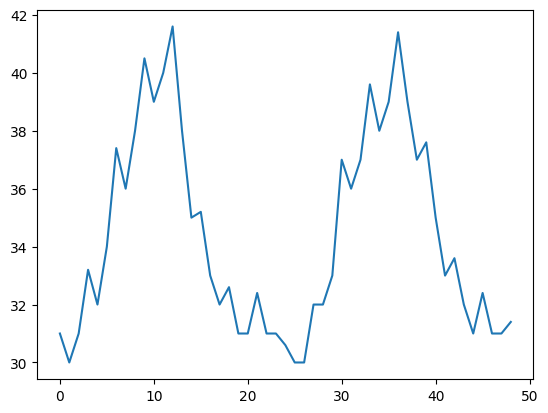

In [81]:
plt.plot(next_6_months_temp.values.flatten())

In [85]:
location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(2024, 5, 26)
end = datetime.datetime(2024, 5, 31)

# Get historical data
data_for_model = Hourly(location, start, end)
data_for_model = data_for_model.fetch()

print(data_for_model)


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2024-05-26 00:00:00  32.4  20.3  49.0   0.0   NaN  290.0   5.4   NaN  1001.5   
2024-05-26 01:00:00  31.0  20.9  55.0   0.0   NaN  240.0  14.8   NaN  1002.0   
2024-05-26 02:00:00  30.0  23.0  66.0   0.0   NaN  230.0  18.4   NaN  1003.0   
2024-05-26 03:00:00  32.0  24.6  65.0   0.0   NaN  230.0   5.4   NaN  1003.1   
2024-05-26 04:00:00  33.0  23.1  56.0   0.0   NaN  250.0  18.4   NaN  1004.0   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2024-05-30 20:00:00  32.0  25.1  67.0   0.0   NaN  240.0  14.8   NaN  1003.0   
2024-05-30 21:00:00  32.4  25.7  68.0   0.0   NaN  320.0   3.6   NaN  1003.2   
2024-05-30 22:00:00  31.0  23.9  66.0   0.0   NaN  210.0  22.3   NaN  1003.0   
2024-05-30 23:00:00  30.0  21.9  62.0   0.0   NaN  200.0  22.3   NaN  1004.0   
2024-05-31 00:00:00  31.6  24.2  65.0   

In [89]:
data_for_model=data_for_model.iloc[21:]

In [91]:
data_for_model.reset_index(inplace=True)

data_for_model=data_for_model[["time",target_column]]

data_for_model['month'] = data_for_model['time'].dt.month
data_for_model['hour'] = data_for_model['time'].dt.hour  
data_for_model["dayofyear"]=data_for_model["time"].dt.dayofyear

seasonal_mean = data_for_model.groupby(['month', 'hour'])["temp"].transform('mean') 
data_for_model[target_column] = data_for_model[target_column].fillna(seasonal_mean) 



data_for_model=data_for_model[[target_column,"month","hour","dayofyear"]]

In [92]:
data_for_model=Standard.transform(np.array(data_for_model.values).reshape(-1,1))


In [94]:
data_for_model=data_for_model.reshape(100,4)

In [96]:
from datetime import datetime, timedelta
import numpy as np

output = []
base_date = datetime(2024, 5, 31, 0)  
num_hours = 30

for i in range(num_hours):
    future_datetime = base_date + timedelta(hours=i + 1)
    
    # Extract features
    hour = future_datetime.hour
    day_of_year = future_datetime.timetuple().tm_yday
    month = future_datetime.month

    prediction = best_model.predict(data_for_model.reshape(-1, window_size, 4), verbose=1)
    predicted_temp = prediction[0][0]
    output.append(predicted_temp)

    next_input = np.array([predicted_temp, month, hour, day_of_year])
    next_input_scaled = Standard.transform(next_input.reshape(-1, 1))
    data_for_model = np.vstack([data_for_model[1:], next_input_scaled.reshape(1, 4)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [97]:
next_6_months_temp=list(next_6_months_temp.values)

In [98]:
next_6_months_temp=next_6_months_temp[:30]

In [99]:
print("Len Output:",len(output))
print("Len next_6_months_temp:",len(next_6_months_temp))


Len Output: 30
Len next_6_months_temp: 30


In [302]:
list(np.array(output).flatten())

[42.26219,
 43.584137,
 43.63522,
 43.651714,
 43.65484,
 43.41555,
 43.422462,
 43.423683,
 43.413635,
 43.61869,
 43.50193,
 43.36956,
 43.212875,
 43.339005,
 43.33207,
 43.325966,
 43.320354,
 43.31549,
 43.31143,
 43.308105,
 43.3054,
 43.30322,
 43.301453,
 43.30001,
 43.298832,
 43.297867,
 43.297073,
 43.296406,
 43.295853,
 43.295387]

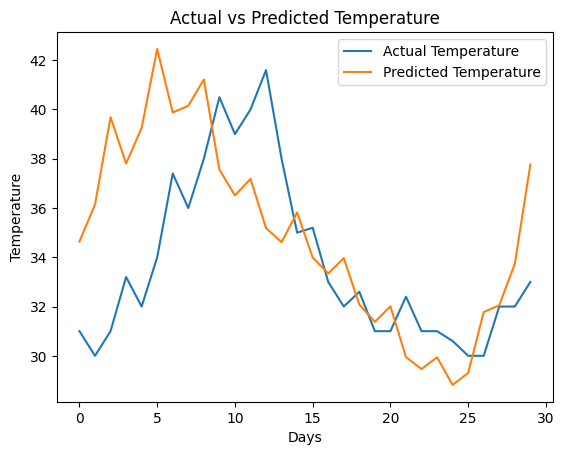

In [100]:

# Plot the two arrays
import matplotlib.pyplot as plt

plt.plot(list(next_6_months_temp), label="Actual Temperature")
plt.plot(list(np.array(output).flatten()), label="Predicted Temperature")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [101]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(list(next_6_months_temp),list(np.array(output).flatten()))

14.344017470668323

In [102]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,4))

931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [103]:
len(y_prediction_x)

29784

In [104]:
import pickle as pkl

pkl.dump(Standard,open("StandardScaler_hourly.pkl",'wb'))

In [66]:
MinMax_Loaded=pkl.load(open("/kaggle/working/MinMax_Avg.pkl","rb"))

# EVALUTION 

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error


In [106]:
def model_evaluation(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    medianae=median_absolute_error(y_true,y_pred)
    
    
    metrics = {
        "Mean Sqaured Error": mse,
        "Mean Absolute Error": mae,
        "Median Absolute Error": medianae
    }
    return metrics

In [107]:
def display_metrics(metrics, save_path=None):
    """Stylishly display metrics using Matplotlib and optionally save the plot."""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.barh(list(metrics.keys()), list(metrics.values()), color="skyblue")
    ax.set_title("Model Evaluation Metrics", fontsize=16, fontweight="bold")
    ax.set_xlabel("Scores", fontsize=12)
    ax.set_xlim(0, 4)
    for i, v in enumerate(metrics.values()):
        ax.text(v + 0.01, i, f"{v:.2f}", color="black", va="center", fontsize=10)
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Metrics plot saved to {save_path}")
    plt.show()

In [109]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,4))

931/931 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


Metrics plot saved to Model_Evalution_Metrics.png


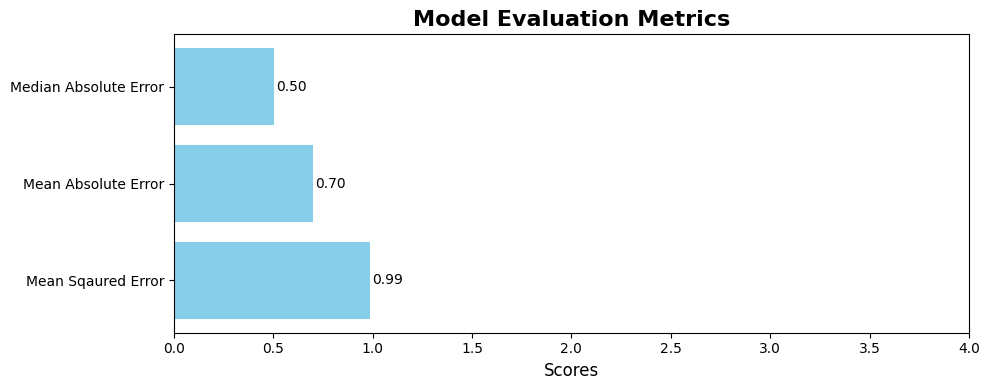

In [110]:
display_metrics(model_evaluation(Y_test,y_prediction_x),"Model_Evalution_Metrics.png")

In [111]:
r2_score(Y_test,y_prediction_x)

0.9755656583054535

## ALL MODEL EVALUTION

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error


In [160]:
from meteostat import Point, Hourly
import datetime

def prepare_data(feature,scaler):    
    location = Point( 23.0215374, 72.5800568)
    start = datetime.datetime(1990, 6, 1)
    end = datetime.datetime(2024, 6, 1)
    
    # Get historical data
    data = Hourly(location, start, end)
    data = data.fetch()
    
    
    temperature_avg=data[feature]
    print("TOTAL NULL VALUES IN DATASET:",temperature_avg.isnull().sum())
    temperature_avg.dropna(inplace=True)
    
    temperature_avg_seq=temperature_avg.values
    print(temperature_avg_seq,temperature_avg_seq.shape)
    
    
    
    window_size=100
    
    X=[]
    Y=[]
    for i in range(len(temperature_avg_seq)-window_size):
      X.append(temperature_avg_seq[i:i+window_size])
      Y.append(temperature_avg_seq[i+window_size])
    
    X=np.array(X)
    Y=np.array(Y)

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

    print("X_train Shape",X_train.shape)
    print("X_test Shape",X_test.shape)
    print("Y_train Shape",Y_train.shape)
    print("Y_test Shape",Y_test.shape)


    X_train_Scaled=scaler.transform(X_train.reshape(-1,1))
    X_test_Scaled=scaler.transform(X_test.reshape(-1,1))

    X_train=X_train_Scaled.reshape(X_train.shape[0],100)
    X_test=X_test_Scaled.reshape(X_test.shape[0],100)

    
    print("AFTER SCALED")
    print("X_train Shape",X_train.shape)
    print("X_test Shape",X_test.shape)
    print("Y_train Shape",Y_train.shape)
    print("Y_test Shape",Y_test.shape)
    




    
    return X_train,X_test,Y_train,Y_test

In [155]:
def model_evaluation(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    medianae=median_absolute_error(y_true,y_pred)
    
    
    metrics = {
        "Mean Sqaured Error": mse,
        "Mean Absolute Error": mae,
        "Median Absolute Error": medianae
    }
    return metrics

In [156]:

def display_all_metrics(metrics_dicts, features):
   
    fig, ax = plt.subplots(figsize=(12, 6))
 
    num_groups = len(metrics_dicts)
    bar_width = 0.15
    indices = np.arange(len(metrics_dicts[0])) 
    
    
    for i, (metrics, feature) in enumerate(zip(metrics_dicts, features)):
        bar_positions = indices + i * bar_width
        ax.barh(bar_positions, list(metrics.values()), bar_width, label=feature)
 
        for j, v in enumerate(metrics.values()):
            ax.text(v + 0.01, bar_positions[j], f"{v:.2f}", va="center", fontsize=9)
    
 
    ax.set_title("Model Evaluation Metrics", fontsize=16, fontweight="bold")
    ax.set_xlabel("Scores", fontsize=12)
    ax.set_xlim(0, 4) 
    ax.set_yticks(indices + (num_groups - 1) * bar_width / 2)
    ax.set_yticklabels(metrics_dicts[0].keys(), fontsize=10)
    ax.legend(loc="best", title="Feature Sets", fontsize=10)
    
    plt.tight_layout()
    plt.show()


## 1. TEMPERATURE 

## MIN MAX SCALER

In [157]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_best_MinMax_Hourly.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [158]:
MinMax_Avg=pkl.load(open("/kaggle/working/MinMaxScaler_avg_hourly.pkl","rb"))

In [161]:
X_train,X_test,Y_train,Y_test=prepare_data("temp",MinMax_Avg)

TOTAL NULL VALUES IN DATASET: 150410
[25.4 29.4 33.4 ... 31.  30.  31. ] (147647,)
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)
AFTER SCALED
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [162]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [538]:
y_prediction_x[0],Y_test[0]

(array([28.638676], dtype=float32), 29.3)

In [163]:
from sklearn.metrics import mean_squared_error
print("MEAN SQAURED ERROR:",mean_squared_error(Y_test,y_prediction_x))

temp_avg_minmax=model_evaluation(Y_test,y_prediction_x)

MEAN SQAURED ERROR: 2.0569216010734004


## STANDARD SCALER

In [164]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_best_Standard_Hourly.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [165]:
Standard_Avg=pkl.load(open("/kaggle/working/StandardScaler_hourly.pkl","rb"))

In [167]:
X_train,X_test,Y_train,Y_test=prepare_data("temp",Standard_Avg)

TOTAL NULL VALUES IN DATASET: 150410
[25.4 29.4 33.4 ... 31.  30.  31. ] (147647,)
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)
AFTER SCALED
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [168]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [169]:
from sklearn.metrics import mean_squared_error
print("MEAN SQAURED ERROR:",mean_squared_error(Y_test,y_prediction_x))


temp_avg_Standard=model_evaluation(Y_test,y_prediction_x)

MEAN SQAURED ERROR: 1.9910862400166045


## VISUAL

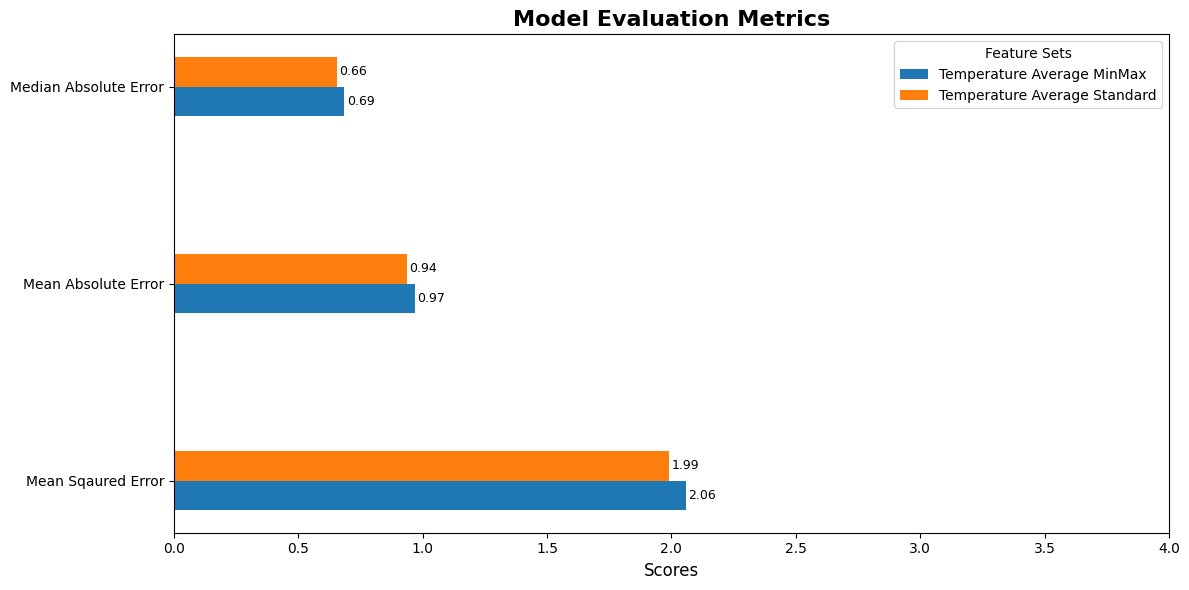

In [170]:
metrics_dicts = [
    temp_avg_minmax, temp_avg_Standard,
]
features = [
    "Temperature Average MinMax", "Temperature Average Standard",
]

# Display all metrics in a single plot
display_all_metrics(metrics_dicts, features)

 <h1 style="text-align:center;">END</h1>

---